# Linear Regression Model with 7 Predictors (3 combinations)

Try different combinations of 7 predictors, pick the best 3 models with highest R-sq and lowest MSE. Only output the 3 best models (predicted vs. real plot, MSE, R^2). Report any violations of validity

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv("cleaned_dataset.csv")

In [3]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


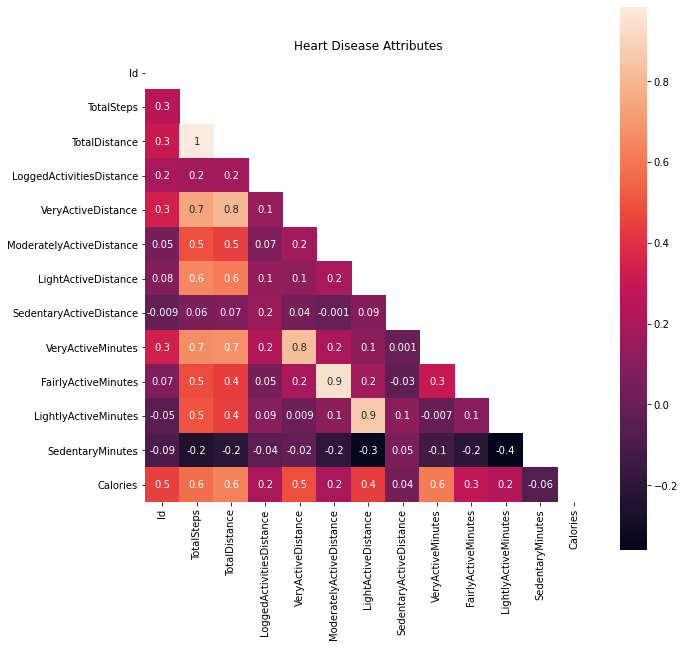

In [4]:
# heatmap to show correlations

plt.figure(figsize=(10, 10))

matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(), annot=True, fmt='.1g', square=True, mask=matrix)
plt.title("Heart Disease Attributes")
plt.show()

In [5]:
#set random_state to get the same split every time
train, test = train_test_split(data, test_size=0.2, random_state=42)

print("Shape of full dataset is: {0}".format(data.shape))
print("Shape of training dataset is: {0}".format(train.shape))
print("Shape of test dataset is: {0}".format(test.shape))

Shape of full dataset is: (894, 14)
Shape of training dataset is: (715, 14)
Shape of test dataset is: (179, 14)


# 1st Model (focus on minutes data):

In [6]:
#extracting the right data
X_train1 = train[['LoggedActivitiesDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', \
                  'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]

Y_train1 = train['Calories']

X_test1 = test[['LoggedActivitiesDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', \
                  'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]
Y_test1 = test['Calories']

In [7]:
# training the model
regression = LinearRegression()
regression.fit(X_train1, Y_train1)
predicted_y = regression.predict(X_test1)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1306.6449290753592
Coefficients: 
 [ 4.34741056e+01 -1.16853839e+03  1.27032999e+01  4.16104715e+00
  1.96684085e+00  2.91258415e-01]


In [8]:
# calculating error 
r2_test = regression.score(X_test1, Y_test1)
r2_train = regression.score(X_train1, Y_train1)
mse_test = mean_squared_error(predicted_y, Y_test1)
mse_train = mean_squared_error(Y_train1, regression.predict(X_train1))

print(f'MSE of Test = {mse_test:.5}')
print(f'MSE of Train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of Test = 3.1969e+05
MSE of Train data = 2.6776e+05
R^2 of Test = 0.3459
R^2 of Train = 0.48098


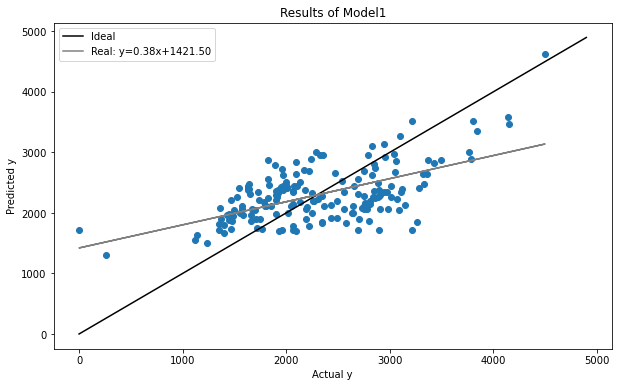

In [9]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test1, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Results of Model1")

# plotting the best fit line
m, b = np.polyfit(Y_test1, predicted_y, 1)
ax.plot(Y_test1, m*Y_test1 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# check validity
prediction = regression.predict(X_train1)
residual = Y_train1 - prediction
print(f'Mean of Residuals: {residual.mean()}') 

# the independent variables set 
X = data[['LoggedActivitiesDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', \
                  'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

Mean of Residuals: -2.121094287001899e-13
                    feature       VIF
0  LoggedActivitiesDistance  1.124660
1   SedentaryActiveDistance  1.093185
2         VeryActiveMinutes  1.630456
3       FairlyActiveMinutes  1.636703
4      LightlyActiveMinutes  3.212940
5          SedentaryMinutes  3.036771


# 2nd Model (focus on distance):

In [11]:
#extracting the right data
X_train2 = train[['LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', \
                  'LightActiveDistance', 'SedentaryActiveDistance', 'SedentaryMinutes']]

Y_train2 = train['Calories']

X_test2 = test[['LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', \
                  'LightActiveDistance', 'SedentaryActiveDistance', 'SedentaryMinutes']]
Y_test2 = test['Calories']

In [12]:
# training the model
regression = LinearRegression()
regression.fit(X_train2, Y_train2)
predicted_y = regression.predict(X_test2)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1437.12247494522
Coefficients: 
 [ 1.04796768e+02  1.08524525e+02  5.67724472e+01  1.44927467e+02
 -3.41517445e+03  1.75593577e-01]


In [13]:
# calculating error 
r2_test = regression.score(X_test2, Y_test2)
r2_train = regression.score(X_train2, Y_train2)
mse_test = mean_squared_error(predicted_y, Y_test2)
mse_train = mean_squared_error(Y_train2, regression.predict(X_train2))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 3.4774e+05
MSE of train data = 2.9518e+05
R^2 of Test = 0.2885
R^2 of Train = 0.42781


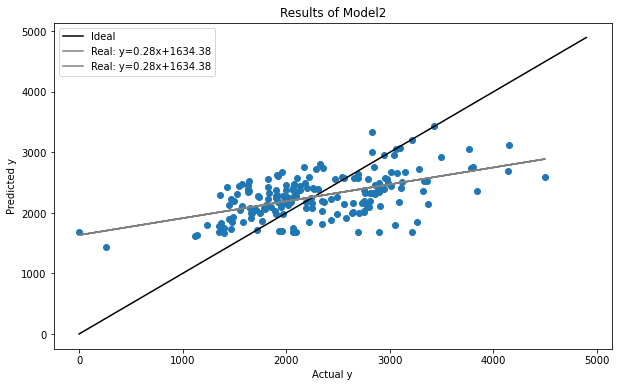

In [14]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test2, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Results of Model2")

# plotting the best fit line
m, b = np.polyfit(Y_test2, predicted_y, 1)
ax.plot(Y_test2, m*Y_test2 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

# plotting the best fit line
m, b = np.polyfit(Y_test1, predicted_y, 1)
ax.plot(Y_test1, m*Y_test1 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [15]:
# check validity
prediction = regression.predict(X_train2)
residual = Y_train2 - prediction
print(f'Mean of Residuals: {residual.mean()}') 

# the independent variables set 
X = data[['LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', \
          'LightActiveDistance', 'SedentaryActiveDistance', 'SedentaryMinutes']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

Mean of Residuals: 3.4344555171844843e-14
                    feature       VIF
0  LoggedActivitiesDistance  1.091675
1        VeryActiveDistance  1.419754
2  ModeratelyActiveDistance  1.525227
3       LightActiveDistance  3.145836
4   SedentaryActiveDistance  1.085907
5          SedentaryMinutes  2.780805


# 3rd Model (use one very highly correlated factor)

In [16]:
#extracting the right data
X_train3 = train[['TotalDistance', 'LoggedActivitiesDistance', \
                  'SedentaryActiveDistance','LightlyActiveMinutes', 'SedentaryMinutes']]
Y_train3 = train['Calories']

X_test3 = test[['TotalDistance', 'LoggedActivitiesDistance', \
                'SedentaryActiveDistance','LightlyActiveMinutes', 'SedentaryMinutes']]
Y_test3 = test['Calories']

In [17]:
# training the model
regression = LinearRegression()
regression.fit(X_train3, Y_train3)
predicted_y = regression.predict(X_test3)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1602.6453935176564
Coefficients: 
 [ 1.20470621e+02  1.06272011e+02 -2.84498219e+03 -3.38325998e-01
  9.47825620e-02]


In [18]:
# calculating error 
r2_test = regression.score(X_test3, Y_test3)
r2_train = regression.score(X_train3, Y_train3)
mse_test = mean_squared_error(predicted_y, Y_test3)
mse_train = mean_squared_error(Y_train2, regression.predict(X_train3))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 3.3074e+05
MSE of train data = 2.8933e+05
R^2 of Test = 0.32329
R^2 of Train = 0.43915


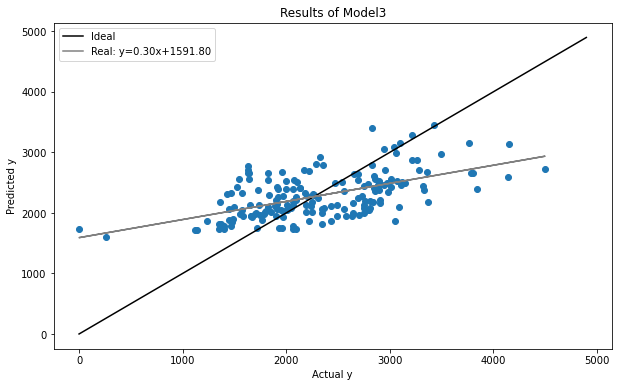

In [19]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test3, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Results of Model3")

# plotting the best fit line
m, b = np.polyfit(Y_test3, predicted_y, 1)
ax.plot(Y_test3, m*Y_test3 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [20]:
# check validity
prediction = regression.predict(X_train3)
residual = Y_train3 - prediction
print(f'Mean of Residuals: {residual.mean()}') 

# the independent variables set 
X = data[['TotalDistance', 'LoggedActivitiesDistance', \
          'SedentaryActiveDistance','LightlyActiveMinutes', 'SedentaryMinutes']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

Mean of Residuals: -2.617182306150769e-13
                    feature       VIF
0             TotalDistance  4.079284
1  LoggedActivitiesDistance  1.091006
2   SedentaryActiveDistance  1.089550
3      LightlyActiveMinutes  4.773667
4          SedentaryMinutes  3.082260


# Polynomial Regression just for fun :^)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# training the model on the 3rd data set
transformer = PolynomialFeatures(2, include_bias=False)
expanded_Xtrain = transformer.fit_transform(X_train3)
expanded_Xtest = transformer.fit_transform(X_test3)
pd.DataFrame(expanded_Xtrain).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,7.150000e+02
mean,5.840154,0.129238,0.001497,200.917483,971.539860,49.899316,1.253676,0.010882,1364.865217,5431.946228,0.472820,0.001017,33.355817,117.492485,0.000061,0.373231,1.495021,50797.404196,184414.786014,1.027644e+06
std,3.976687,0.675838,0.007660,102.196755,289.606668,73.645316,7.087267,0.073394,1163.236151,4113.702761,2.884818,0.019747,200.800478,648.379180,0.000634,1.878861,6.644117,43156.492166,100352.828851,5.498948e+05
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00
25%,3.010000,0.000000,0.000000,137.000000,725.500000,9.060100,0.000000,0.000000,454.159999,2753.114930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18769.000000,120367.500000,5.263505e+05
50%,5.540000,0.000000,0.000000,204.000000,1038.000000,30.691600,0.000000,0.000000,1240.979985,4891.589975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41616.000000,174956.000000,1.077444e+06
75%,7.915000,0.000000,0.000000,267.500000,1203.500000,62.647249,0.000000,0.000000,1960.874969,6810.980192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71556.500000,250076.000000,1.448412e+06
max,28.030001,4.942142,0.110000,513.000000,1440.000000,785.680939,70.229391,1.068100,10849.410395,29098.079249,24.424768,0.448986,1876.057835,5341.288913,0.012100,28.200000,77.879999,263169.000000,472473.000000,2.073600e+06


In [22]:
regression = LinearRegression().fit(expanded_Xtrain, Y_train3)
regression.fit(expanded_Xtrain, Y_train3)
predicted_y = regression.predict(expanded_Xtest)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 322.95104828777266
Coefficients: 
 [ 2.02912158e+02  1.00813083e+03 -3.59330094e+04  6.62709637e-01
  2.32628022e+00 -2.56798806e+00  5.93741924e-01 -1.35581004e+03
  1.15029965e-01 -5.85690806e-02 -4.65373557e+01 -1.03771588e+04
 -1.37177272e+00 -3.35766752e-01  3.77602149e+05  6.22357229e+01
  2.19229336e+01 -1.41254403e-03 -1.59348003e-03 -9.05204030e-04]


In [23]:
# calculating error 
r2_test = regression.score(expanded_Xtest, Y_test3)
r2_train = regression.score(expanded_Xtrain, Y_train3)
mse_test = mean_squared_error(predicted_y, Y_test3)
mse_train = mean_squared_error(Y_train3, regression.predict(expanded_Xtrain))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 3.1962e+05
MSE of train data = 2.4498e+05
R^2 of Test = 0.34604
R^2 of Train = 0.52513


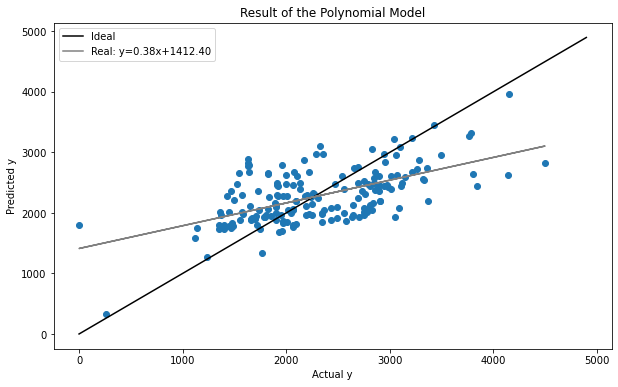

In [24]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test3, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Result of the Polynomial Model")

# plotting the best fit line
m, b = np.polyfit(Y_test3, predicted_y, 1)
ax.plot(Y_test3, m*Y_test3 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [25]:
# just some residual plots

x_matrix = transformer.fit_transform(X_train1)
prediction = regression.predict(x_matrix)
residual = Y_train1 - prediction

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(X_train1.VeryActiveMinutes, residual, s = 6)
ax[0].set_xlabel('Very Active Minutes')
ax[0].set_ylabel("Residual Number of Calories")
ax[0].set_title("Residuals for Polynomial Model")
ax[0].axhline(0, color='k')

ax[1].scatter(X_train1.SedentaryMinutes, residual, s = 6)
ax[1].set_xlabel('Sedentary Minutes')
ax[1].set_ylabel("Residual Number of Calories")
ax[1].set_title("Residuals for Polynomial Model")
ax[1].axhline(0, color='k')

ax[2].scatter(X_train1.LightlyActiveMinutes, residual, s = 6)
ax[2].set_xlabel('Lightly Active Minutes')
ax[2].set_ylabel("Residual Number of Calories")
ax[2].set_title("Residuals for Polynomial Model")
ax[2].axhline(0, color='k')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 27)